In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_excel("dados.xlsx")
df.to_csv("novo.csv", sep=",")
df = pd.read_csv("novo.csv")

In [3]:
capital = ['Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador', 'Fortaleza', 'Brasília', 'Vitória', 'Goiânia', 'São Luís', 'Cuiabá', 'Campo Grande', 'Belo Horizonte', 'Belém',
'João Pessoa', 'Curitiba', 'Recife', 'Teresina', 'Rio de Janeiro', 'Natal', 'Porto Alegre', 'Porto Velho', 'Boa Vista', 'Florianópolis', 'São Paulo', 'Aracaju', 'Palmas']

In [4]:
is_capital = []
for c in df['city']:
    if c in capital:
        is_capital.append(1)
    else:
        is_capital.append(0)

In [5]:
df['capital'] = is_capital

In [6]:
df['date'] = pd.to_datetime(df['usage_time'], format='%Y-%m-%d %H:%M:%S.%f').dt.date
df['time'] = pd.to_datetime(df['usage_time'], format='%Y-%m-%d %H:%M:%S.%f').dt.time

In [7]:
months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
months_df = []
for x in range(0, len(df)):
    datee = datetime.datetime.strptime(df['usage_time'][x], '%Y-%m-%d %H:%M:%S.%f')
    months_df.append(months[datee.month -1])
df['month'] = months_df

In [8]:
hour = []
for x in range(len(df)):
    hour.append(df['time'][x].hour)    

In [9]:
hour_type_arr = []
hour_type = ''
for x in range(len(df)):
    if df['time'][x].hour <= 12:
        hour_type = 'Manhã'
    elif df['time'][x].hour <= 17:
        hour_type = 'Tarde'
    elif df['time'][x].hour:
        hour_type = 'Noite'   
    hour_type_arr.append(hour_type)

In [10]:
df['hour'] = hour
df['hour_type'] = hour_type_arr

In [11]:
df

,Unnamed: 0,usage_time,is_first_usage,restaurant,city,neighborhood,capital,date,time,month,hour,hour_type
0,0,2019-07-29 22:30:00.000,0,Kaisho - Culinária Japonesa,São Paulo,Cerqueira César,1,2019-07-29,22:30:00,Julho,22,Noite
1,1,2019-07-29 22:00:00.000,0,Kaisho - Culinária Japonesa,São Paulo,Cerqueira César,1,2019-07-29,22:00:00,Julho,22,Noite
2,2,2019-07-29 21:00:00.000,0,L'Entrecôte de Paris - Market Place,São Paulo,Morumbi,1,2019-07-29,21:00:00,Julho,21,Noite
3,3,2019-07-29 21:00:00.000,0,Le Vin Bistrô - Jardins,São Paulo,Cerqueira César,1,2019-07-29,21:00:00,Julho,21,Noite
4,4,2019-07-29 20:30:00.000,0,Mexilhão Bar e Restaurante,São Paulo,Bela Vista,1,2019-07-29,20:30:00,Julho,20,Noite
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2019-01-01 14:30:00.000,0,Casa do Don - Ristorante & Pizzeria,São Paulo,Moema,1,2019-01-01,14:30:00,Janeiro,14,Tarde
99996,99996,2019-01-01 14:00:00.000,0,La Cabaña Parrilla,São Paulo,Moema,1,2019-01-01,14:00:00,Janeiro,14,Tarde
99997,99997,2019-01-01 13:47:50.432,0,Salitre - Ipanema,Rio de Janeiro,Ipanema,1,2019-01-01,13:47:50.432000,Janeiro,13,Tarde
99998,99998,2019-01-01 13:30:00.000,0,Forneria - Pátio Higienópolis,São Paulo,Higienópolis,1,2019-01-01,13:30:00,Janeiro,13,Tarde


In [48]:
df = df.iloc[::-1]

## Distribuição Geral de Ocorrências - Cidades x Mês
### A maioria das cidades (exceto Guarulhos e Norte Flumense) tem ocorrência no mês de Junho.

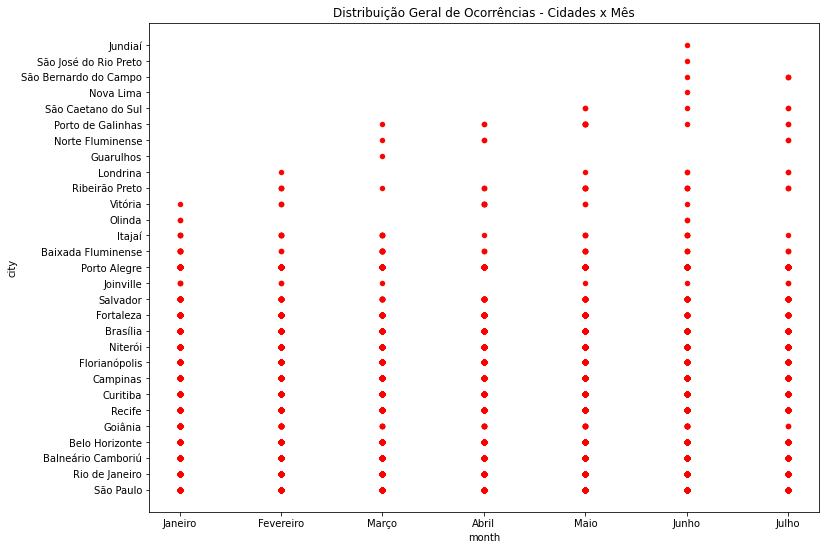

In [72]:
df.plot(kind='scatter', x='month', y='city',color='red', title='Distribuição Geral de Ocorrências - Cidades x Mês')
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

## Distribuição Geral de Ocorrências - Cidades x Horas
### Somente as cidades de São Paulo e Rio de Janeiro tem ocorrêcias em todos os horários.
### As cidades de Guarulhos e Jundiaí só possuem registros às 21:00.
### A cidade de São José do Rio Preto só possui registro às 20:00.

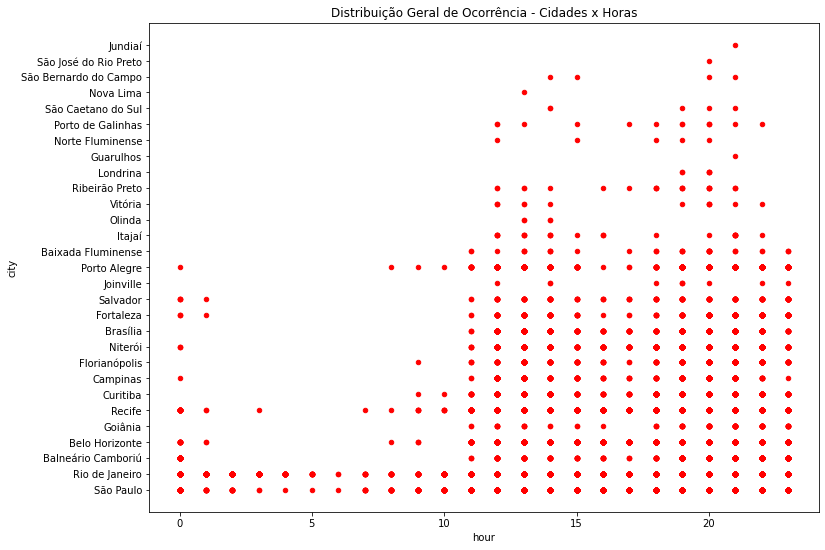

In [101]:
df.plot(kind='scatter', x='hour', y='city',color='red', title='Distribuição Geral de Ocorrência - Cidades x Horas')
plt.rcParams["figure.figsize"] = (1, 5)
plt.show()

## Distribuição Geral de Ocorrências - Cidades x Totais
### Existe um discrepância, muitas cidades com poucos registros, e poucas cidades com muitos registros.

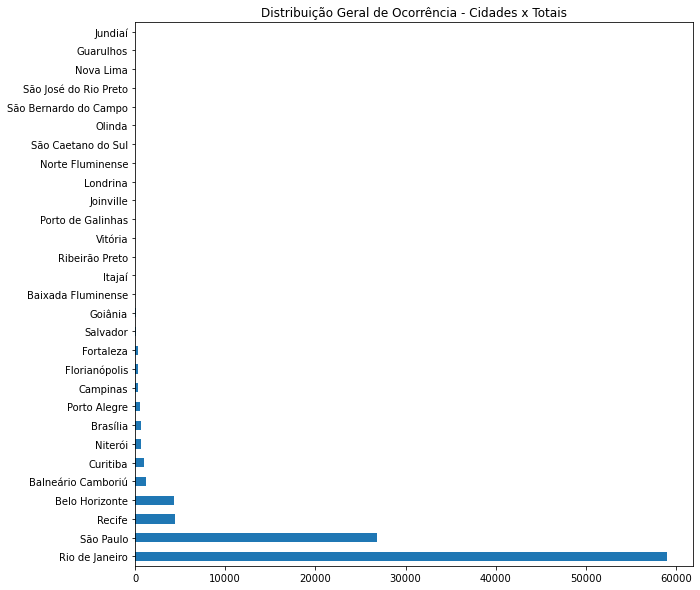

In [85]:
df['city'].value_counts().plot(kind='barh', figsize=(10,10), title='Distribuição Geral de Ocorrência - Cidades x Totais')


## Distribuição Geral de Ocorrências - Cidades x Totais (Exceto São Paulo e Rio de Janeiro)

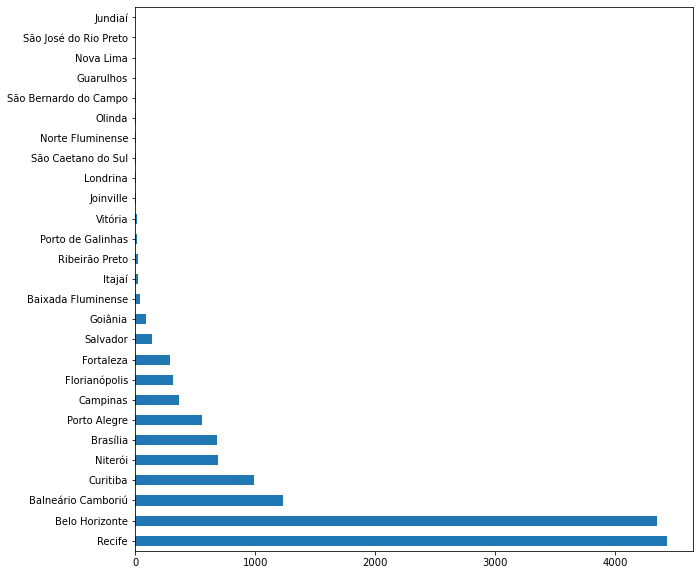

In [91]:
df_no_rj = df[df['city'] != 'Rio de Janeiro']
df_no_rj_sp = df_no_rj[df_no_rj['city'] != 'São Paulo']
df_no_rj_sp['city'].value_counts().plot(kind='barh', figsize=(10,10)) 

## Distribuição Geral de Ocorrências - Cidades x Totais (Exceto São Paulo, Rio de Janeiro, Recife e Belo Horizonte)¶

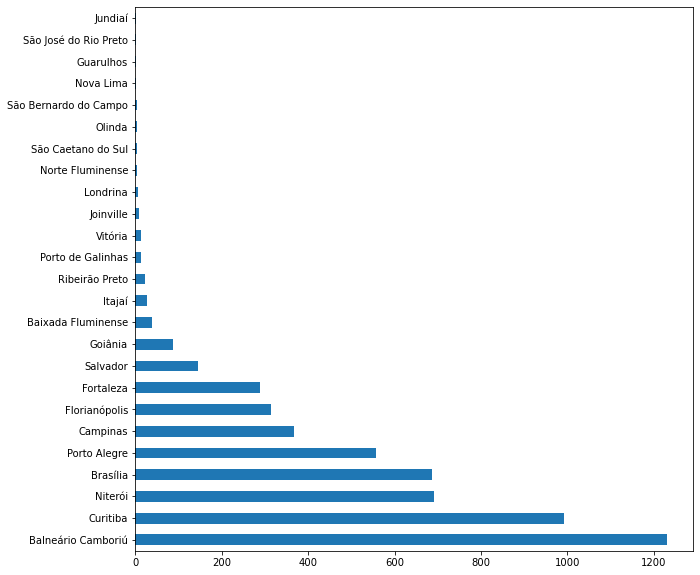

In [96]:
df_n = df[df['city'] != 'Rio de Janeiro']
df_n = df_n[df_n['city'] != 'São Paulo']
df_n = df_n[df_n['city'] != 'Recife']
df_n = df_n[df_n['city'] != 'Belo Horizonte']
df_n['city'].value_counts().plot(kind='barh', figsize=(10,10)) 

## Distribuição Geral de Ocorrências - Mês x Totais
### Meses Agosto, Setembro, Outubro, Novembro e Dezembro não possuem ocorrências

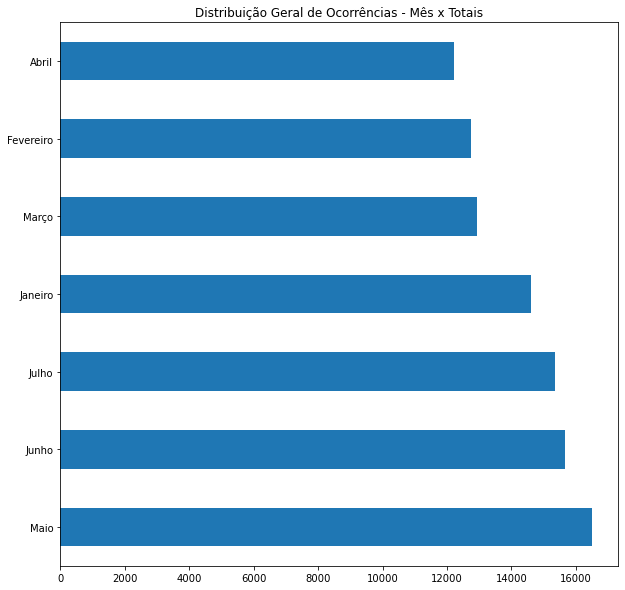

In [152]:
df['month'].value_counts().plot(kind='barh', figsize=(10,10), title='Distribuição Geral de Ocorrências - Mês x Totais') 

## Análise das Cidades com maiores ocorrências

In [175]:
city_groups_count = df.groupby(['city']).size()
city_groups_count.nlargest(n=5, keep='first')

city
Rio de Janeiro        58914
São Paulo             26806
Recife                 4425
Belo Horizonte         4346
Balneário Camboriú     1229
dtype: int64

## Análise da cidade do Rio de Janeiro
### É possível perceber uma ocilação de queda no início de março e última semana de abril

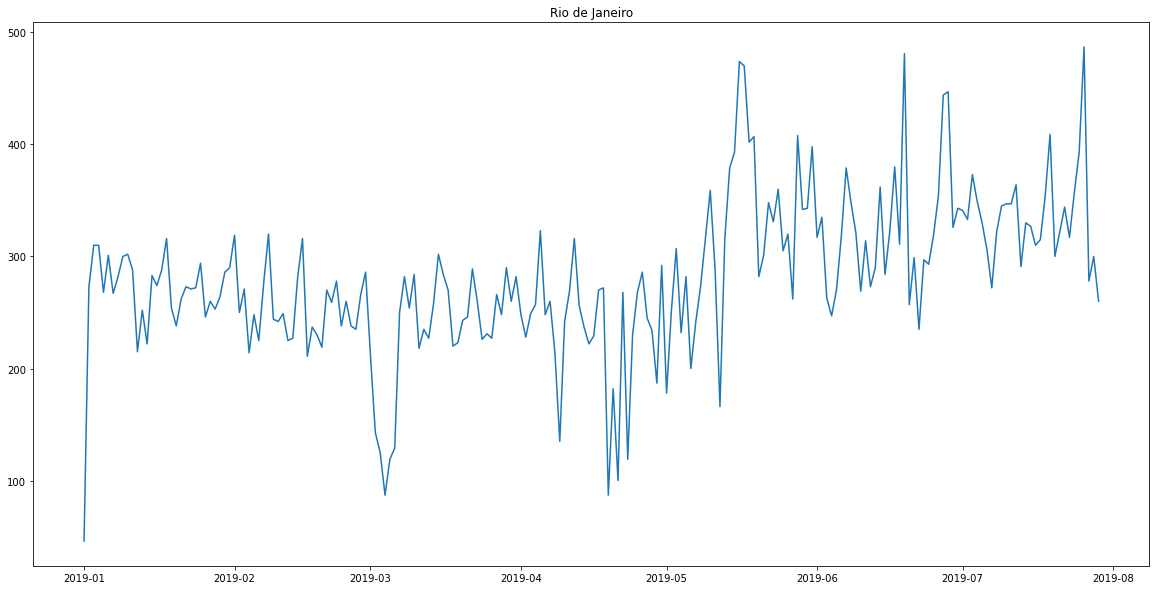

In [168]:
df[df['city'] == 'Rio de Janeiro']['date'].value_counts().plot(figsize=(20,10), title='Rio de Janeiro')

### Analisando o mês de março, é possível verificar que entre os dias 1, 2, 3 e 4 de março ocorreu um constante declínio

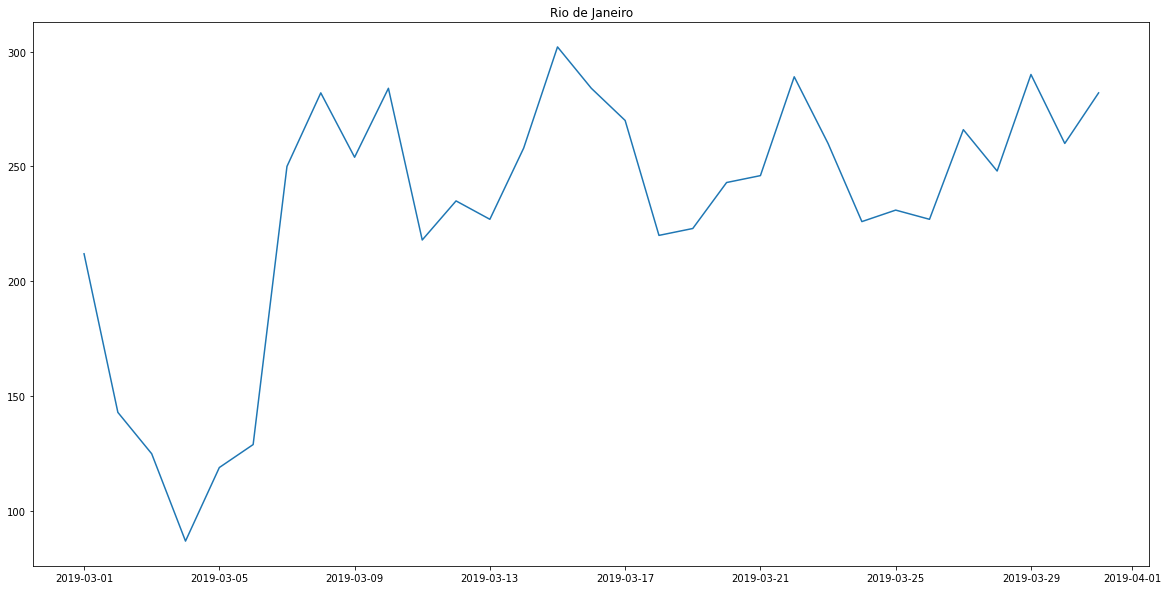

In [174]:
df_rj = df[df['city'] == 'Rio de Janeiro']
df_rj = df_rj[df_rj['month'] == 'Março']
df_rj['date'].value_counts().plot(figsize=(20,10), title='Rio de Janeiro')

## Análise da cidade de São Paulo
### É possível perceber um padrão de comportamento de baixas seguido de altas (talvez altas nos finais de semana).
### Também fica evidente um padrão muito similar entre o fim de maio e meados de junho.

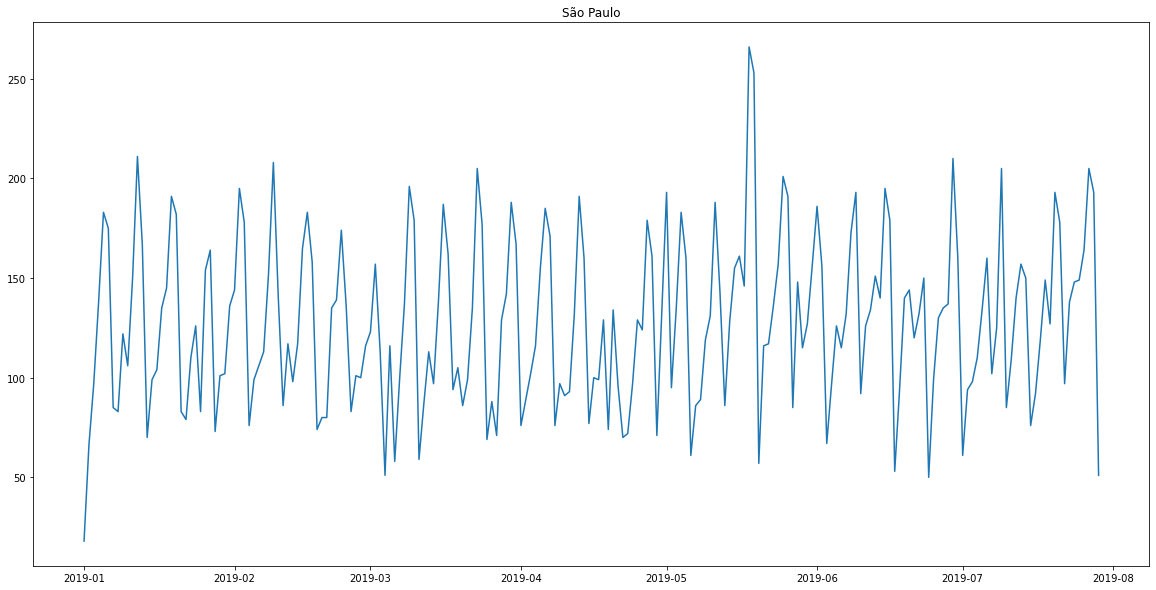

In [169]:
df[df['city'] == 'São Paulo']['date'] .value_counts().plot(figsize=(20,10), title='São Paulo')

## Análise da cidade de Recife
### Aqui não é possível (ao menos descritivamente) nenhum tipo de padrão apenas ocilações de comportamento.

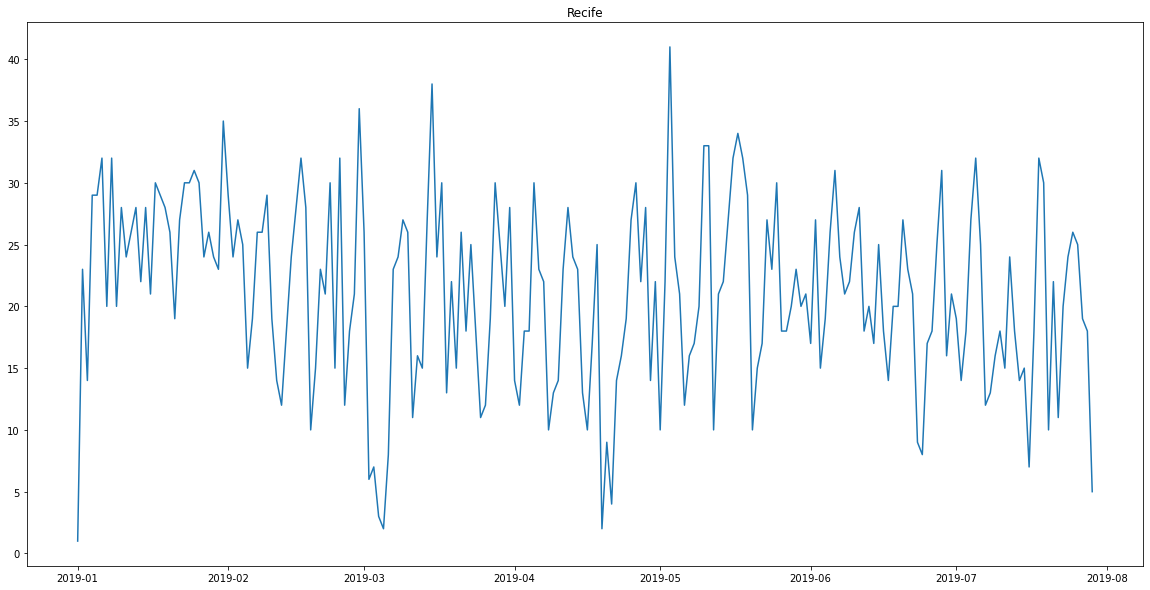

In [178]:
df[df['city'] == 'Recife']['date'].value_counts().plot(figsize=(20,10), title='Recife')

## Análise da cidade de Belo Horizonte e Balneário Camburiú
### Assim como no gráfico de Recife, BH e BC apresentam ocilações de comportamento. 

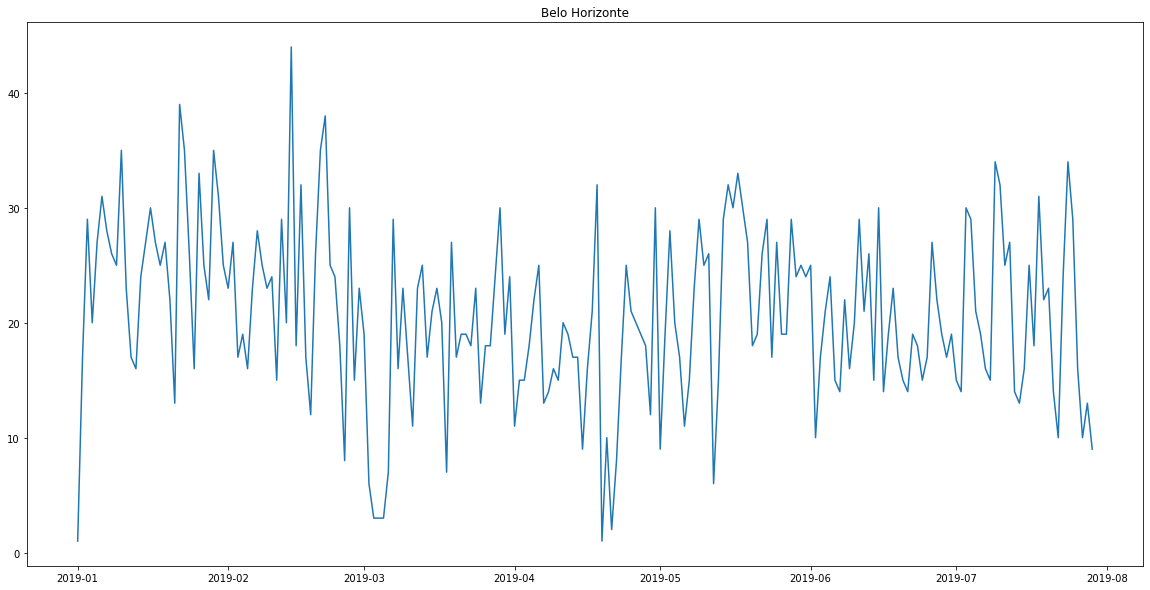

In [179]:
df[df['city'] == 'Belo Horizonte']['date'].value_counts().plot(figsize=(20,10), title='Belo Horizonte')

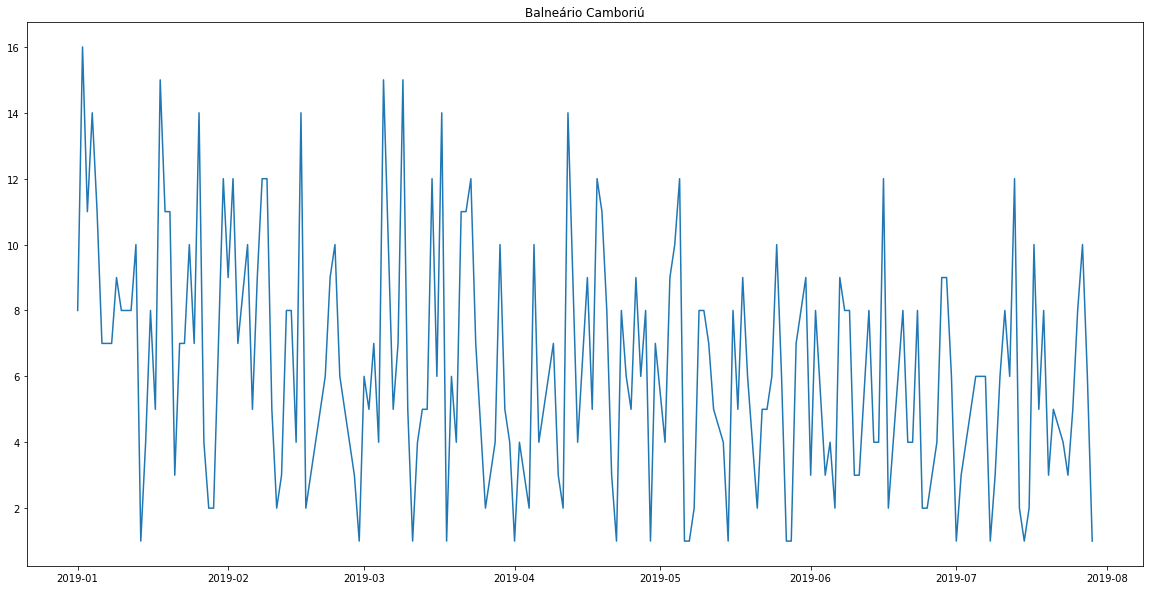

In [180]:
df[df['city'] == 'Balneário Camboriú']['date'].value_counts().plot(figsize=(20,10), title='Balneário Camboriú')

## Conclusão
### Um ponto importante a se observar é que em todos os casos ocorreu uma queda acentuada entre os dias 1 e 5 de março em todas as cidades.

In [185]:
restaurant_groups_count = df.groupby(['restaurant']).size()
restaurant_groups_count.nlargest(n=5,keep='first')

restaurant
San Benito                          2875
Pobre Juan - Village Mall           2323
Mocellin Steak - Barra da Tijuca    1627
Koi Sushi Japanese Fusion Food       921
CT Brasserie - Village Mall          767
dtype: int64

## Análise do Restaurante San Benito
### Pelo gráfico é possível verificar um comportamento de queda em alguns dias específicos da semana.

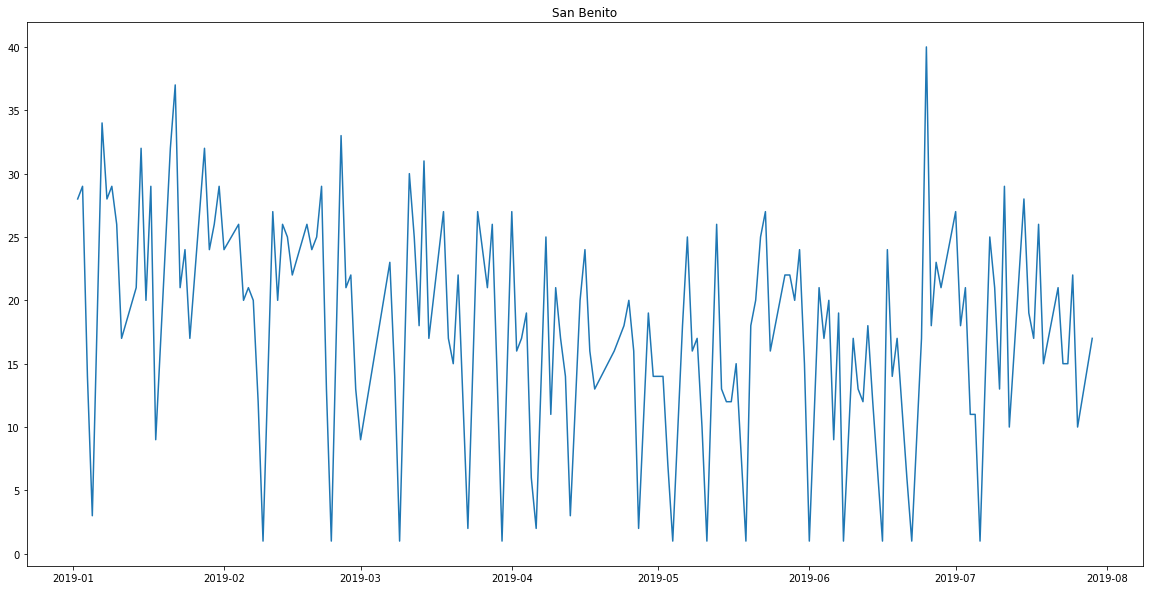

In [186]:
df[df['restaurant'] == 'San Benito']['date'].value_counts().plot(figsize=(20,10), title='San Benito')

## Análise aprofundada
### Com esse gráfico podemos ver que nos dias 4, 11 e 19 de maio de 2019, que são dois sábados e um domingo, ocorre uma baixa.
### Talvez gerar cupons promocionais nesses dias para tentar aumentar o ticket médio.

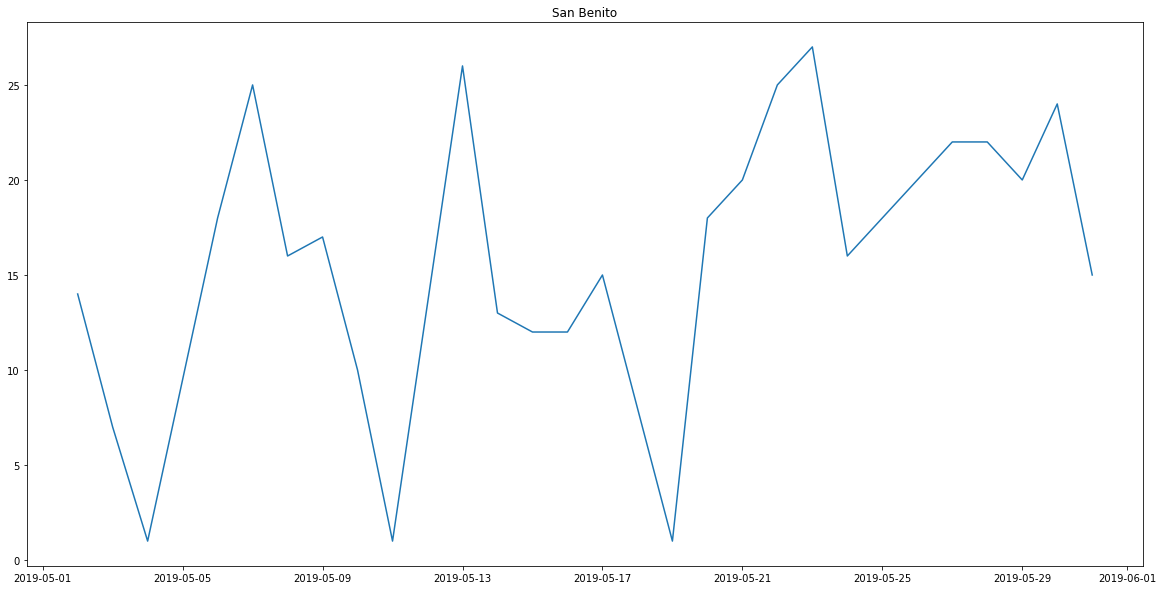

In [188]:
df_sb = df[df['restaurant'] == 'San Benito']
df_sb = df_sb[df_sb['month'] == 'Maio']
df_sb['date'].value_counts().plot(figsize=(20,10), title='San Benito')

## Top 20 bairros com mais registros

In [193]:
neighborhood_groups_count = df.groupby(['neighborhood']).size()
neighborhood_groups_count.nlargest(n=20, keep='first')

neighborhood
Barra da Tijuca        20160
Centro                 14634
Leblon                  4555
Botafogo                4157
Ipanema                 3324
Itaim Bibi              3216
Copacabana              3014
Moema                   2726
Tijuca                  2133
Jardim Paulista         2033
Pinheiros               1499
Vila Nova Conceição     1496
Jardins                 1492
Morumbi                 1478
Vila Olímpia            1262
Pina                    1164
Higienópolis            1160
Lourdes                 1156
Boa Viagem              1085
Balneário Camboriú      1080
dtype: int64

## Percentual de uso dos Top 20 Restaurantes

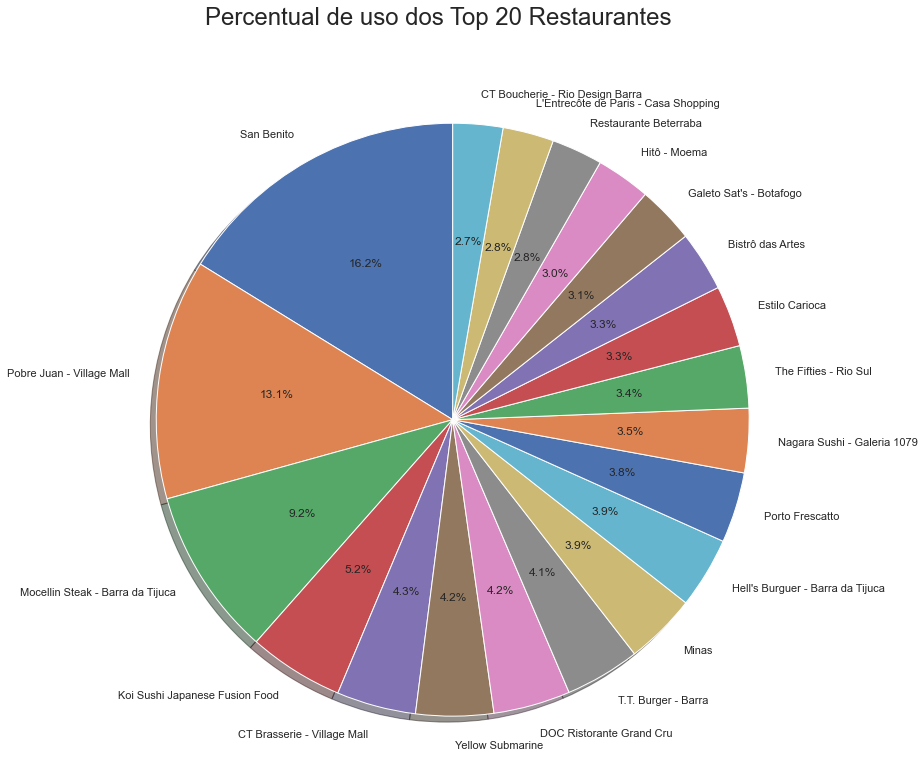

In [273]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,12)
labels = df_restaurant_top_20['restaurant']
sizes = df_restaurant_top_20['count']
fig1, ax1 = plt.subplots()
fig1.suptitle('Percentual de uso dos Top 20 Restaurantes', fontsize=24)
ax1.pie(sizes, labels=labels, autopct='%2.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Análise de reincidência de restaurante
### Apenas três restaurantes fizeram um único registro: 
#### - Meu Chapa - Salvador Shopping 
#### - Wikipoke 
#### - The Cosmopolitan Pub

In [210]:
df_fu_0 = df[df['is_first_usage'] == 0]
df_fu_0_restaurant = [*{*df_fu_0['restaurant']}]
df_fu_1 = df[df['is_first_usage'] == 1]

In [211]:
only_one = []
for c in df_fu_1['restaurant']:
    if c not in df_fu_0_restaurant:
        only_one.append(c)

In [212]:
len(only_one)

3

In [213]:
only_one

['Meu Chapa - Salvador Shopping', 'Wikipoke', 'The Cosmopolitan Pub']